1. scikit-learn 으로부터 의사결정나무 모듈을 불러오는 코드를 아래에 작성하세요.

In [65]:
from sklearn.tree import DecisionTreeClassifier

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요
## 데이터 다운로드
--- 
아래 셀을 실행시켜 데이터를 colab에 불러옵니다.  
셀 실행은 Ctrl + Enter 를 이용해 실행 시킬 수 있습니다. 

In [2]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


FileNotFoundError: [Errno 2] No such file or directory: '3gLj0Q6'

## 라이브러리 불러오기
---
아래 셀을 실행시켜 pandas 와 DecisionTreeClassifier 를 불러옵니다.

In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

## 데이터 불러오기
---
아래 셀을 실행시켜 csv 파일 데이터를 DataFrame 객체로 불러옵니다.

In [71]:
train = pd.read_csv('./따릉이/train.csv') 
test = pd.read_csv('./따릉이/test.csv')

## 결측치 제거하기
---
결측치를 제거하고, 결측치가 모두 제거됐는지 확인합니다.

In [72]:
test = test.dropna()
train = train.dropna()

print(train.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64


2. train 데이터중 <br>
예측해야할 `count` 피쳐를 drop()함수를 사용하고, axis=1 옵션을 사용해 해당 열을 제외한 데이터들을 `X_train` 이라는 이름의 DataFrame 객체로 만들고 <br>
`count` 피쳐만을 데이터로 갖는 `Y_train` 이라는 이름의 DataFrame 객체로 만드는 코드를 아래에 작성하세요

In [73]:
X_train = train.drop('count',axis=1)
Y_train = train['count']

3. `model` 변수명으로 모델을 선언하고, fit() 함수를 사용해서, `X_train` 을 input 으로 삼고, `Y_train` 을 output 으로 삼아 모델을 훈련시키는 코드를 아래에 작성하세요

In [74]:
model = DecisionTreeRegressor()
model.fit(X_train,Y_train)

DecisionTreeRegressor()

4. predict() 를 이용해 test data 를 훈련된 모델로 예측한 data 를 생성하고 예측결과 상위 5개를 출력하는 코드를 작성하세요.

In [75]:
pred = model.predict(test)
pred = pd.DataFrame(data=pred)
#pred.sort_values(by=0).tail(5)
pred[:5]

,0
0,117.0
1,164.0
2,114.0
3,49.0
4,64.0


## 데이터 다운로드 2
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [76]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


FileNotFoundError: [Errno 2] No such file or directory: '3i4n1QB'

In [77]:
# 라이브러리 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [78]:
train = pd.read_csv('./와인/train.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


5. sklearn에 model_selection 부분 속 KFold를 불러와보세요

In [79]:
from sklearn.model_selection import KFold

6. KFold에 n_splits = 5, shuffle = True, random_state = 0이라는 인자를 추가해 "kf"라는 변수에 저장해보세요

In [80]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

7. 반복문을 통해서 1번부터 5번까지의 데이터에 접근해보세요 (추가문제입니다. 꼭 풀 필요는 없되 답지를 참고해주세요.)

In [81]:
for train_idx, valid_idx in kf.split(train) :
  train_data = train.iloc[train_idx]
  valid_data = train.iloc[valid_idx]

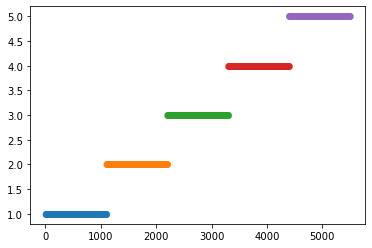

In [82]:
import matplotlib.pyplot as plt


kf = KFold(n_splits = 5, shuffle = False) #, random_state=0
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train) :
  plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
  i += 1
plt.show()